Dung Nguyen

Data Mining II, Dimensionality Reduction Methods - Task 2

Principal Component Analysis (PCA)

December 25, 2021

**Scenario 2**

One of the most critical factors in patient relationship management that directly affects a hospital’s long-term cost-effectiveness is understanding its patients and the conditions leading to hospital admissions. When a hospital can better understand its patients’ characteristics, it is better able to target treatment to patients, resulting in more effective cost of care for the hospital in the long term.
 
You are an analyst for a hospital that wants to better understand the characteristics of its patients. You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.



# Part 1: Research Question

**A1. Research Question:**

Can we determine which variables are the most important to predicting which patients are at high risk of readmission? Can we better understand our patients and identify patterns unique to the readmitted patient?

I am not using a supervised learning model like linear regression or K Nearest Neighbor(KNN). Instead, I will use Python's principal component analysis (PCA). How can we reduce dimension and use lesser features to identify the class of our answer variable without causing the effect on accuracy?  I am trying to understand the relationships between patients' features better to inform the hospital decisions.  

**A2. The goal of the data analysis:**
    
The business will be able to identify which variables are the most important to predicting which patients are at high risk of readmission with some measure of confidence. This process will provide weight for making improvements to hospital services and treatments. This data analysis aims to present numerical values to hospital businesses to help them better understand their patients and the principal components that cause readmissions.

# Part 2: Method Justification

**B1. Explanation of the principal component analysis (PCA) technique:**

The Principal Component Analysis is used for feature extraction in this analysis assignment. The analysis of PCA includes linear algebra operations to handle the dataset into a more controllable form with far fewer and more significant variables, which are the most important to predicting which patients are at high risk of readmission with some measure of confidence. 

"Principal Component Analysis is a mathematical technique used for dimensionality reduction. Its goal is to reduce the number of features while keeping most of the original information." (Radecic Dario, 2020)

According to Kinson The Genius, these are eight steps to performing PCA in Python:

   Step 1: Import the Necessary Modules
   
   Step 2: Obtain Your Dataset
   
   Step 3: Preview Your Data
   
   Step 4: Standardize the Data
   
   Step 5: Perform PCA
   
   Step 6: Combine Target and Principal Components
   
   Step 7: Do a Scree Plot of the Principal Components
   
   Step 8: Visualize your New Data in 2D

(Kinson The Genius, 2019)

**B2. Assumption of the the principal component analysis (PCA) technique** (one)

According to UCLA, "PCA makes the assumption that there is no unique variance, the total variance is equal to common variance. Recall that variance can be partitioned into common and unique variance." (UCLA, n.d)

**B3. Tool and technique:**

I have many programming languages that I can use, such as R and Python, to achieve this process. In this assignment, I use Python to assess data quality, clean the data, and predict the data. Python is a multipurpose programming language with libraries that extend its capabilities to do statistical analysis. For the beginner, coding in Python is easy to read and easy to understand the flows of the program. Also, I will work with Python in the Jupyter notebooks as a convenient way to run code and visualizations and accessible to running documentation for my reference. 
 
The libraries and packages used to clean the data run in python environments such as Panda, NumPy, Scipy, Matplotlib, and Seaborn. These libraries and packages provide functionalities like reading large datasets like statistical functions like Zscore, creating visualization models like box plots and histograms. I also use Scikit-learn for the principal component analysis (PCA) technique.


# Part 3: Data Preparation

**C1. Dataset Variables and Steps for preparation:**

1. Install necessary packages
2. Read and check the data set in Python using Pandas' read_csv command
3. Naming the dataset as the variable "medical_df" and subsequent proper slices of the data frame as "medical_df".
4. Evaluate the data structure to understand input data better
5. Drop the less meaningful variables and Rename the last 8 survey columns for a better description of variables
6. Categorical Encoding Values with two types, Yes/No. - Target variable
7. Re-validate column, null values, and find missing values.
8. Display any duplicate rows in the data frame.
9. Creating histograms, boxplots, plot-bar of continuous variables
10. Show the prepared data. ( The prepared data set copy C2)

I chose the medical dataset for this performance assignment by using **medical_clean.cvs** file.
The medical_clean data set is 10000 patient records in the medical industry and 50 columns (variables).

In the cleaning process, we may discover relevance of **continuous predictor variables:** Children, Age, Income, Initial_days, TotalCharge, Additional_charges

**The dependent/target variable** is 'ReAdmis' which is binary categorical with only two values, Yes or No, so I will encode it with 1/0 values.

During this prepare process, will drop all less meaningful variables, categorical variables: 'CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone', 'Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services', 'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'


**Explain the steps**

In [1]:
#1. Install necessary packages

# Install necessary packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install sns
!pip install plotly
!pip install missingno
!pip install six
!pip install pydotplus
!pip install graphviz
# I'm sharing the computer with the family members. The file path may show his name. 
# Please watch the video to see the file path.

In [2]:
# Ignor warning error
import warnings
warnings.filterwarnings('ignore')

# Standard imports
import os
import sys
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import missingno as msno
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


#for encoding
%matplotlib inline 


# Scipy
from scipy.cluster.vq import kmeans, vq

# Import Scikit-learn 
import sklearn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree




In [3]:
#2. Read and check the data set in Python using Pandas' read_csv command
path = 'medical_clean.csv'
medical_df_clean = pd.read_csv(path)

In [4]:
#3.Display Medical dataframe
medical_df = medical_df_clean.copy()
medical_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#4. Evaluate the data structure to understand input data better

# Dataset size
medical_df.shape

(10000, 50)

In [6]:
#Check numerical and categorical data
# check numerical and categorical data
cat_df = medical_df.select_dtypes(include=['object'])
num_df = medical_df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Customer_id
Interaction
UID
City
State
County
Area
TimeZone
Job
Marital
Gender
ReAdmis
Soft_drink
Initial_admin
HighBlood
Stroke
Complication_risk
Overweight
Arthritis
Diabetes
Hyperlipidemia
BackPain
Anxiety
Allergic_rhinitis
Reflux_esophagitis
Asthma
Services

Numeric columns:
CaseOrder
Zip
Lat
Lng
Population
Children
Age
Income
VitD_levels
Doc_visits
Full_meals_eaten
vitD_supp
Initial_days
TotalCharge
Additional_charges
Item1
Item2
Item3
Item4
Item5
Item6
Item7
Item8


In [7]:
# Check the information of data
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [8]:
# Describe Churn dataset statistics
medical_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [9]:
#5. Drop the original categorical and less meaningful variables
medical_df = medical_df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
                                      'Lat','Lng','Population','Area','TimeZone', 'Soft_drink','Initial_admin','HighBlood',
                                      'Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia',
                                      'BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services',
                                      'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
                                      'Job', 'Marital', 'Gender',
                                      'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'])


In [10]:
#6. Encoding Categorical Values with two categories, Yes/No 

medical_df["ReAdmis"] = np.where(medical_df["ReAdmis"].str.contains("Yes"), 1, 0)


In [11]:
#Check what values are assigned in the variables.
medical_df['ReAdmis'].unique() 

array([0, 1])

In [12]:
#7. Re-validate column data types and missing value

medical_df.columns.to_series().groupby(medical_df.dtypes).groups


{int32: ['ReAdmis'], int64: ['Children', 'Age'], float64: ['Income', 'Initial_days', 'TotalCharge', 'Additional_charges']}

In [13]:
# check null values
df = medical_df.columns
data_nulls = df.isnull().sum()
print(data_nulls)

0


In [14]:
# check missing data and its size
def missing_cols(medical_df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in medical_df.columns:
        missing_vals = medical_df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {medical_df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(medical_df)

no missing values left


In [15]:
#8. Display any duplicate rows in the dataframe.
data_duplicates = medical_df.loc[medical_df.duplicated()]
print(data_duplicates)

Empty DataFrame
Columns: [Children, Age, Income, ReAdmis, Initial_days, TotalCharge, Additional_charges]
Index: []


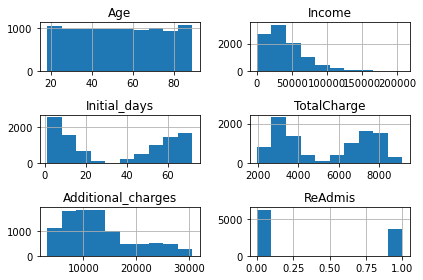

In [16]:
#9. Check distribution by creating histograms of variables 
medical_df[['Age','Income','Initial_days','TotalCharge','Additional_charges', 'ReAdmis']].hist()
plt.savefig('medical_continuos_pyplot.jpg')
plt.tight_layout()

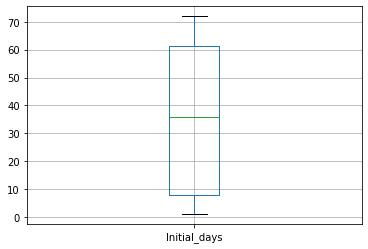

In [17]:
medical_df.boxplot(['Initial_days'])
plt.savefig('medical_boxplots_Initial_days.jpg')

In [18]:
# MonthlyCharge range in column
print("Minimum Initial_days is", int(medical_df.Initial_days.min()))
print("Maximum Initial_days is", int(medical_df.Initial_days.max()))
print("Initial_days range is", int(medical_df.Initial_days.max()-medical_df.Initial_days.min()))

Minimum Initial_days is 1
Maximum Initial_days is 71
Initial_days range is 70


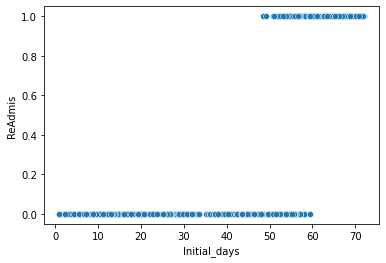

In [19]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=medical_df['Initial_days'], y=medical_df['ReAdmis'])
plt.show();

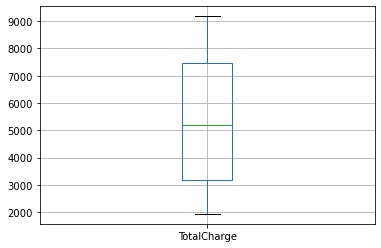

In [20]:
medical_df.boxplot(['TotalCharge'])
plt.savefig('medical_boxplots_TotalCharge.jpg')

In [21]:
# MonthlyCharge range in column
print("Minimum TotalCharge is", int(medical_df.TotalCharge.min()))
print("Maximum TotalCharge is", int(medical_df.TotalCharge.max()))
print("TotalCharge range is", int(medical_df.TotalCharge.max()-medical_df.TotalCharge.min()))

Minimum TotalCharge is 1938
Maximum TotalCharge is 9180
TotalCharge range is 7242


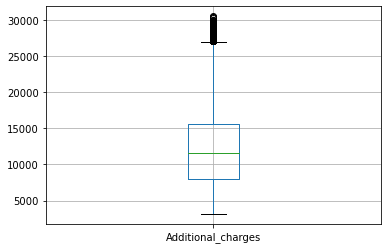

In [22]:
medical_df.boxplot(['Additional_charges'])
plt.savefig('medical_boxplots_AdditionalCharge.jpg')

In [23]:
# Additional_charges range in column
print("Minimum Additional_chargesis", int(medical_df.Additional_charges.min()))
print("Maximum Additional_charges is", int(medical_df.Additional_charges.max()))
print("Additional_charges range is", int(medical_df.Additional_charges.max()-medical_df.Additional_charges.min()))

Minimum Additional_chargesis 3125
Maximum Additional_charges is 30566
Additional_charges range is 27440


In [24]:
AgeGroup = medical_df.groupby(by = 'Age').size()
AgeGroup

Age
18    133
19    137
20    120
21    125
22    141
     ... 
85    135
86    156
87    136
88    143
89    132
Length: 72, dtype: int64

<AxesSubplot:xlabel='Age'>

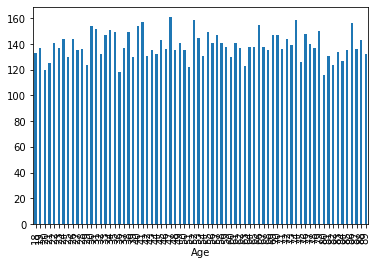

In [25]:
%matplotlib inline
AgeGroup.plot.bar()

In [26]:
# Age range in column
print("Minimum Age is", medical_df.Age.min())
print("Maximum Age is", medical_df.Age.max())
print("Age range is", medical_df.Age.max()-medical_df.Age.min())

Minimum Age is 18
Maximum Age is 89
Age range is 71


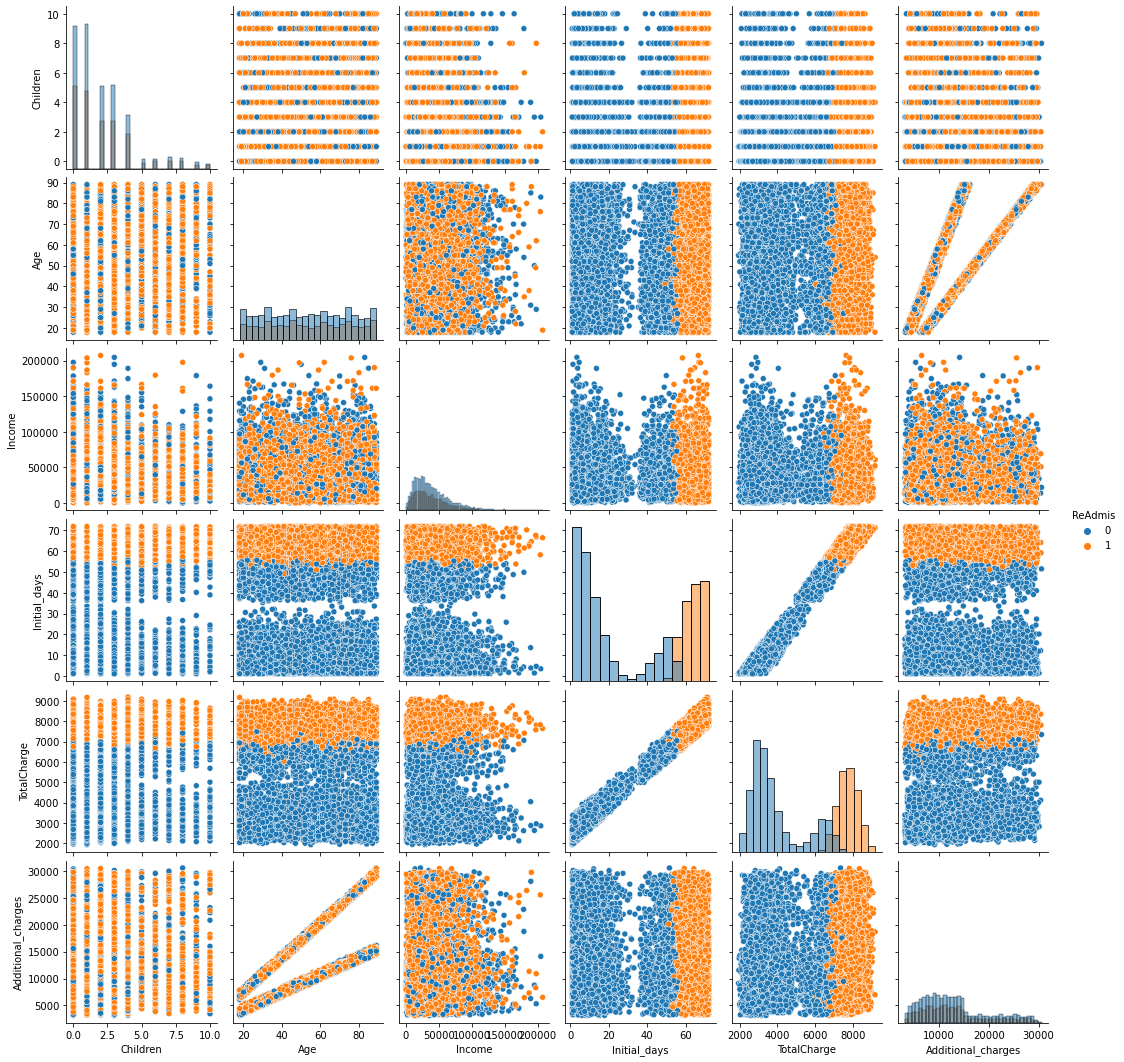

In [27]:
# Seaborn pairplot of numeric variables for high level overview of potential relationships & distributions
sns.pairplot(medical_df, hue='ReAdmis', diag_kind='hist')

plt.savefig("Seaborn pairplot.png")

In [28]:
# Create medical dataframe for heatmap analysis of correlation
medical_heatmap = medical_df[['Children', 'Age', 'Income','Initial_days', 'TotalCharge',
       'Additional_charges', 'ReAdmis']]

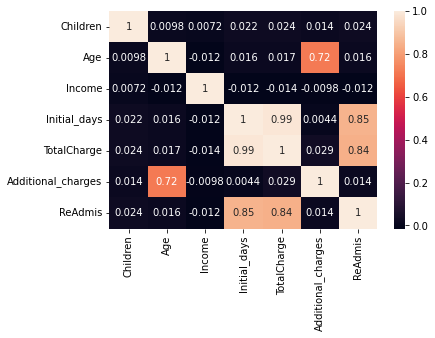

In [29]:
# Visualize feature scaling
sns.heatmap(medical_heatmap.corr(), annot=True)
plt.savefig('medical_heatmap.corr.jpg')
plt.show()

In [30]:
medical_df.head()

,Children,Age,Income,ReAdmis,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,0,10.585770,3726.702860,17939.403420
1,3,51,46805.99,0,15.129562,4193.190458,17612.998120
2,3,53,14370.14,0,4.772177,2434.234222,17505.192460
3,0,78,39741.49,0,1.714879,2127.830423,12993.437350
4,1,22,1209.56,0,1.254807,2113.073274,3716.525786


In [31]:
medical_df_columns = medical_df.columns
print(medical_df_columns)

Index(['Children', 'Age', 'Income', 'ReAdmis', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')


**C2. Prepared data set copy:**


In [32]:
# Prepared data set copy: medical_prepared_kmeans.csv
for col in medical_df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(medical_df[col].value_counts())

medical_df.to_csv("medical_prepared_PCA.csv", index=False)

----------------------------------------Children---------------------------------------- - 

0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64

----------------------------------------Age---------------------------------------- - 

47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: Age, Length: 72, dtype: int64

----------------------------------------Income---------------------------------------- - 

14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64

----------------------------------------ReAdmis---------------------------------------- - 

0    6331
1    3669
Name: ReAdmis, dtype: int64

----------------------------------------Initial_days---------------------------------------- - 

63.544320    2
67.421390    2
70.325420    2
63.334690    1
67.036510    1
            ..
5.977596     1
5.799041     1
6.415853     1
7.328631     1
70.850590    1
Name: Initial_days, Length: 9997, dtype: int64

----------------------------------------TotalCharge---------------------------------------- - 

7555.452000    2
7964.681000    2
8081.346000    2
3726.702860    1
8449.859000    1
              ..
2345.477165    1
3672.779714    1
3392.003760    1
3866.635381    1
7887.553000    1
Name: TotalCharge, Length: 9997, dtype: int64

----------------------------------------Additional_charges---------------------------------------- - 

24109.572640    3
25325.816470    3
6315.622130     3
11995.005160    3
4880.460246     3
               ..
23226.177810    1
12415.288840    1
28931.863720    1
7219.133007     1
11643.190000    1
Name: Additional_charges, Length: 9418, dtype: int64

**Standardizing the features. Please see Part D1.**

# Part 4: Analysis

**D1. Matrix of all principal component**

In [33]:
# Load medical preapred csv into data frame
medical_df = pd.read_csv('medical_prepared_PCA.csv')
medical_df_columns = medical_df.columns
print(medical_df_columns)

Index(['Children', 'Age', 'Income', 'ReAdmis', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')


We will start by Standardizing the data.

In [34]:
# select train and target data
from sklearn.preprocessing import StandardScaler

In [35]:
# Define matrix of features as X
X = medical_df[['Children', 'Age', 'Income','Initial_days', 'TotalCharge',
       'Additional_charges']]

print(X)

      Children  Age    Income  Initial_days  TotalCharge  Additional_charges
0            1   53  86575.93     10.585770  3726.702860        17939.403420
1            3   51  46805.99     15.129562  4193.190458        17612.998120
2            3   53  14370.14      4.772177  2434.234222        17505.192460
3            0   78  39741.49      1.714879  2127.830423        12993.437350
4            1   22   1209.56      1.254807  2113.073274         3716.525786
...        ...  ...       ...           ...          ...                 ...
9995         2   25  45967.61     51.561220  6850.942000         8927.642000
9996         4   87  14983.02     68.668240  7741.690000        28507.150000
9997         3   45  65917.81     70.154180  8276.481000        15281.210000
9998         3   43  29702.32     63.356900  7644.483000         7781.678000
9999         8   70  62682.63     70.850590  7887.553000        11643.190000

[10000 rows x 6 columns]


In [36]:
# assign y variable - the target
y=medical_df['ReAdmis']

# Standardizing the features
X_standardized = StandardScaler().fit_transform(X)
X_standardized

array([[-0.50712929, -0.02479466,  1.61591429, -0.9073098 , -0.72718477,
         0.76500534],
       [ 0.417277  , -0.1217056 ,  0.22144303, -0.73459473, -0.51322759,
         0.71511362],
       [ 0.417277  , -0.02479466, -0.91586974, -1.12829151, -1.31998284,
         0.6986353 ],
       ...,
       [ 0.417277  , -0.4124384 ,  0.89156936,  1.3569578 ,  1.35959679,
         0.35869505],
       [ 0.417277  , -0.50934933, -0.37827063,  1.09858493,  1.06972732,
        -0.78762373],
       [ 2.72829274,  0.79894828,  0.77813279,  1.38342919,  1.18121275,
        -0.19738374]])

**D2. Total number of principal components**

In [37]:
from sklearn.decomposition import PCA
# Fit standardized matrix of features to PCA class
pca = PCA().fit(X_standardized)
# Print explained variance ratio
print(pca.explained_variance_ratio_)

[0.33222247 0.28555694 0.16784974 0.16513837 0.04727896 0.00195352]


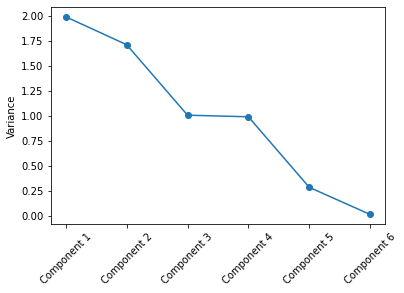

<Figure size 432x288 with 0 Axes>

In [38]:
# Perform the scree plot
def screeplot(pca, standardized_values):
    y = np.std(pca.transform(standardized_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ['Component ' + str(i) for i in x], rotation=45)
    plt.ylabel('Variance')
    plt.show()
    
# Visualize scree plot
screeplot(pca, X_standardized)
plt.savefig('Component_vs_Variance.jpg')

The total number of principal components is six components.

**D3. Variance of each of the principal components**

In [39]:
pca=PCA(n_components=6)
PC=pca.fit_transform(X_standardized)
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.cumsum())

[0.33222247 0.28555694 0.16784974 0.16513837 0.04727896 0.00195352]
[0.33222247 0.61777941 0.78562915 0.95076752 0.99804648 1.        ]


I can see from the above result that principal component 1 holds 33.2% of the information while principal component 2 holds only 28% of the data. Also, it mean while projecting six-dimensional data to two-dimensional data, 39% of information will be lost.

In [40]:
pca_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

pca_var

array([ 33.2,  61.8,  78.6,  95.1,  99.8, 100. ])

In the array, I see that the first component explains around 33% of the variance within our data set, and the first two features explain 61.7%. If we employ four features, we capture 95% of the variance within the dataset; if we employ five features, we capture 99.8% of the dataset's variance, we increase very little by applying an additional feature.

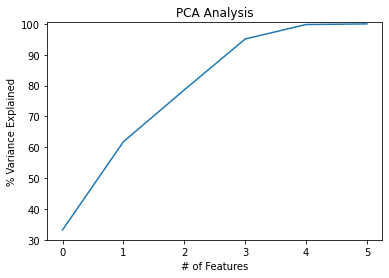

In [41]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(pca_var)
plt.savefig('PCA Analysis.jpg')

Based on the plot above, it is clear we should pick four features.

**D4. Total variance captured by components**

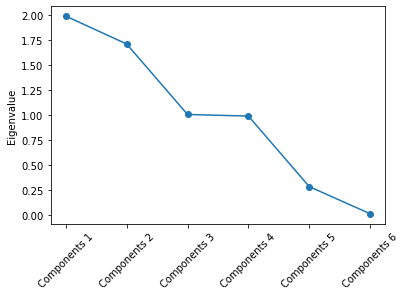

In [42]:
# Perform the scree plot
def screeplot(pca, eihenvalues):
    y = np.std(pca.transform(eihenvalues), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ['Components ' + str(i) for i in x], rotation=45)
    plt.ylabel('Eigenvalue')
    plt.show()
    
# Visualize scree plot
screeplot(pca, X_standardized)



As I can see in the above visualization (scree plot chart and PCA Analysis chart), the two principal components explain 61% of the total variance with a variance greater than or equal to 1.0 from the scree plot above.  I can also see that as the explained variance plotted against the other components with scree plot scores of less than 1.0, we reach 95% explained variance at four components, 98.6% explained variance at five components, and 100% explained variance at six components.

**D5. Results**

As I can see in the above visualization (scree plot chart and PCA Analysis chart), the two principal components explain 61% of the total variance with a variance greater than or equal to 1.0 from the scree plot above. I can also see that as the explained variance plotted against the other components with scree plot scores of less than 1.0, we reach 95% explained variance at four components, 98.6% explained variance at five components, and 100% explained variance at six components.

In the PCA, 'pca.explained_variance_ratio_', the cumulative variation for four-component is 95%. 
I can see from the above result that principal component 1 holds 33.2% of the information while principal component 2 holds only 28% of the data. Also, it means while projecting six-dimensional data to two-dimensional data, 39% of information will be lost. In the array, I see that the first component explains around 33% of the variance within our data set, and the first two features explain 61.7%. If we employ four features, we capture 95% of the conflict within the dataset; if we use five features, we capture 99.8% of the dataset's variance. We increase very little by applying an additional feature. 

PCP is one of the techniques for data preparation and cleaning methods. The principle components change with the perspective of the analyst. We can illustrate some factors that we can consider to aid in calling out the principle features in the medical data set.

The hospital business must understand that the analyst variables result in a total variance of six after scaling. Therefore, we have two components/features with values greater than 1. We may not move forward to more excellent data mining tools to yield greater meaning from these identified components.

The primary benefit of using PCA is reducing the number of variables in the modeling and exploring these components, and studying the correlation between PCA and readmission rates. The analyst's job is to choose which variables contribute to the research question and the business goal. The wide range of variability may skew the model's results, those components with the minuscule contribution in the data set. So the PCS helps perfect the data into more important correlated sections.

The steps which the analysis may escape overfitting followed above include

1. Identify the continuous variables
2. Standardized the continuous variables
3. Determine a covariance matrix
4. Create the scree plot components

# Part 5: Demonstration

**F. Panopto recording**

Panopto video recording of warning and error free code execution to perform data minning tasks is uploaded to https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e2ddf26d-d7b1-487a-b5b1-ae0e002b9410


**G. Sources for third-party code**

[1] Scikit-Learn. (2017, February 10). Principle Component Analysis (PCA) with Scikit-Learn.
https://etav.github.io/python/scikit_pca.html

[2] Sharma Aditya. (2020, January 1). Principal Component Analysis (PCA) in Python.
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

[3] Buchanan Ryan. (2020, December 1). OFM3 — OFM3 TASK 2: DIMENSIONALITY REDUCTION METHODS. 
https://github.com/RyanLBuchanan/D212_Data_Mining_II/tree/main/Performance_Assessment

**H. Acknowledge source**

[4] Galarnyk Michael. (2017. December 4). PCA using Python (scikit-learn).
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

[5] Radecic Dario. (2020, June 20). Principal Component Analysis (PCA) from scratch in Python.
https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

[6] Kindson The Genius. (2019, January 12). Principal Components Analysis(PCA) in Python – Step by Step.
https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/

[7] UCLA-Advanced Research Computing - Statistical Methods and Data Analytics. (n.d). Principal Components (PCA)and Exploratory Factor Analysis (EFA) with SPSS. https://stats.oarc.ucla.edu/spss/seminars/efa-spss/
